In [11]:
import h5py
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback

from scipy.optimize import minimize
from scipy.misc import derivative

from utils import *

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Low kbar range prediction 

In [16]:
# Load data
hf = h5py.File('../XPFS_data/low_kbar/low_kbar.h5', 'r')
model = tf.keras.models.load_model('../models/low_single/cnn_low/')

In [17]:
# Make predictions on 18 test sets with different contrasts 

true = list(np.round(np.linspace(0.1, 0.95, 18), 2))          # desired contrast in the interval 0-1

ml_pred = []

for element in true:
    X_ADU_test = np.array(hf['test']['valid_detector_' + str(element)])            
    
    photon_map = np.round(model.predict(X_ADU_test))
    data = np.reshape(photon_map, (len(photon_map), -1))
    k = np.reshape(data, -1)
    kbar = np.repeat(np.mean(data, axis=1),900) 
    result = minimize(nll,0.8,args=(k,kbar),bounds=((0.001,1.0),))
    dbeta = derivative(nll, x0=result.x,  n=2,  dx=1e-4,  args=(k,kbar)) # for uncertainty from Fisher information 
    ml_pred.append([result.x[0], 1.96/np.sqrt(dbeta*len(k))])
    
    

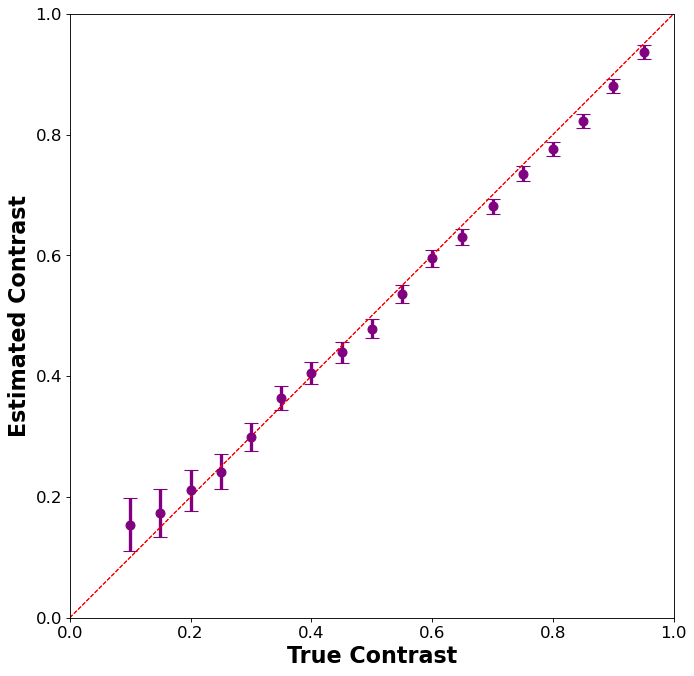

In [19]:
figure(figsize=(10, 10), dpi=80)

ml_pred = np.array(ml_pred)

plt.errorbar(true, ml_pred[:,0], yerr=ml_pred[:,1], fmt='o', markersize=8, elinewidth=3, capsize=6, color='purple',linewidth=1, label = 'CNN')
plt.plot(np.linspace(0,1), np.linspace(0,1), 'r--',linewidth=1.0,label = 'Parity Line')
plt.xlabel("True Contrast", fontsize=20, fontweight = "bold")
plt.ylabel("Estimated Contrast", fontsize=20, fontweight = "bold")
plt.plot(np.linspace(0,1), np.linspace(0,1), 'r--',linewidth=1.0)

plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.gca().set_aspect('equal', adjustable='box')
plt.show()


### Full kbar range prediction

In [20]:
# Load data
hf = h5py.File('../XPFS_data/high_kbar/high_kbar.h5', 'r')
model = tf.keras.models.load_model('../models/full_range_single/cnn_full_range')

In [21]:
true = list(np.round(np.linspace(0.1, 0.95, 18), 2))          # desired contrast in the interval 0-1

ml_pred = []

for element in true:
    X_ADU_test = np.array(hf['test']['valid_detector_' + str(element)])            
    
    photon_map = np.round(model.predict(X_ADU_test))
    data = np.reshape(photon_map, (len(photon_map), -1))
    k = np.reshape(data, -1)
    kbar = np.repeat(np.mean(data, axis=1),900) 
    result = minimize(nll,0.8,args=(k,kbar),bounds=((0.001,1.0),))
    dbeta = derivative(nll, x0=result.x,  n=2,  dx=1e-4,  args=(k,kbar))
    ml_pred.append([result.x[0], 1.96/np.sqrt(dbeta*len(k))])
    
    

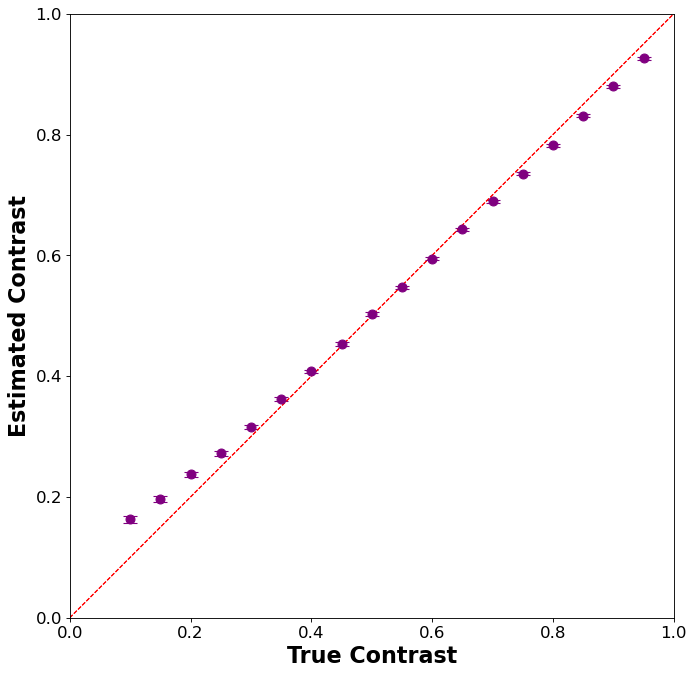

In [22]:
figure(figsize=(10, 10), dpi=80)

ml_pred = np.array(ml_pred)

plt.errorbar(true, ml_pred[:,0], yerr=ml_pred[:,1], fmt='o', markersize=8, elinewidth=3, capsize=6, color='purple',linewidth=1, label = 'CNN')
plt.plot(np.linspace(0,1), np.linspace(0,1), 'r--',linewidth=1.0,label = 'Parity Line')
plt.xlabel("True Contrast", fontsize=20, fontweight = "bold")
plt.ylabel("Estimated Contrast", fontsize=20, fontweight = "bold")
plt.plot(np.linspace(0,1), np.linspace(0,1), 'r--',linewidth=1.0)

plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.gca().set_aspect('equal', adjustable='box')
plt.show()
